In [1]:
import csv
import numpy as np

with open('../.idea/matrix-pl-20211020', 'r', encoding='UTF-8') as file:
    matrix_raw = file.readlines()
    del matrix_raw[0]
    matrix = []
    article_id = []
    for row in matrix_raw:
        splitted_row = row.split()
        article_id.append(splitted_row[0])
        del splitted_row[0]
        matrix.append(splitted_row)

with open('../.idea/cats_dict-pl-20211020', 'r', encoding='UTF-8') as file:
    data_iter = csv.reader(file, delimiter = '\t')
    data = [data for data in data_iter]
categories_dict = {int(i[1]):i[0] for i in data}

with open('../.idea/categories-pl-20211020', 'r', encoding='UTF-8') as file:
    data_iter = csv.reader(file, delimiter = '\t')
    data = [data for data in data_iter]
categories_articles = np.asarray(data, dtype=np.int32)

with open('../.idea/articles_dict-pl-20211020', 'r', encoding='UTF-8') as file:
    data_iter = csv.reader(file, delimiter = '\t')
    data = [data for data in data_iter]
articles_dict = {int(i[1]):i[0] for i in data}

In [2]:
# Equalizing the number of articles in categories

import pandas as pd
my_count = pd.Series(categories_articles[:,1]).value_counts()
w, h = 2, my_count.min()
matrix_tmp = [[0 for x in range(w)] for y in range(h)]
matrix_of_appearances = [[0 for x in range(w)] for y in range(h)]
new_matrix = []
new_categories_articles = []
i = 0
for row in my_count.index:
    matrix_of_appearances[i][0] = row
    matrix_tmp[i][0] = row
    i = i + 1
for row in categories_articles:
    if matrix_of_appearances[matrix_tmp.index([row[1],0])][1] < my_count.min():
        matrix_of_appearances[matrix_tmp.index([row[1],0])][1] = matrix_of_appearances[matrix_tmp.index([row[1],0])][1] + 1
        new_categories_articles.append(row)

with open('../.idea/matrix-pl-20211020', 'r', encoding='UTF-8') as file:
    matrix_raw_norm = file.readlines()
    del matrix_raw_norm[0]
    matrix_to_norm = []
    article_id = []
    for row in matrix_raw_norm:
        splitted_row = row.split()
        article_id.append(splitted_row[0])
        matrix_to_norm.append(splitted_row)


for row_matrix in matrix_to_norm:
    for row_categories_articles in new_categories_articles:
        if int(row_matrix[0]) == row_categories_articles[0]:
            new_matrix.append(row_matrix)
            break
for row in new_matrix:
    del row[0]

print("Najmniej artykułów w kategorii: " + str(my_count.min()))
print("Najwięcej artykułów w kategorii: " + str(my_count.max()))
print("Liczba artykułów przed normalizacją: " + str(len(matrix)))
print("Liczba artykułów po normalizacji: "+ str(len(new_matrix)))
matrix = np.array(new_matrix)
categories_articles = np.array(new_categories_articles)

Najmniej artykułów w kategorii: 20
Najwięcej artykułów w kategorii: 82
Liczba artykułów przed normalizacją: 763
Liczba artykułów po normalizacji: 400


In [3]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = np.array(matrix, dtype=np.int32)
y = categories_articles[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][0.9    0.925  0.95   0.9125 0.9625]
Accuracy: 0.93 (+/- 0.02)
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][[18  0  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0 15  0  0  0  0  0  0  0  0  0  0  1  2  0  0  0  0  0]
 [ 0  0  1 17  0  0  0  0  0  1  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0  0  0  0  0  1  1  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0 17  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  3  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0]
 [ 0  0 

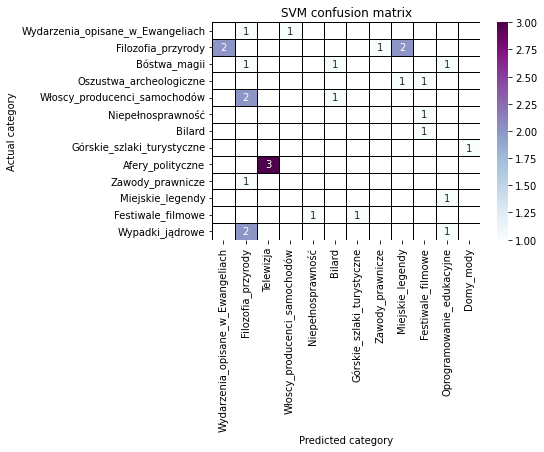

In [4]:
#SVM (LinearSVC)

from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
m_LinearSVC = LinearSVC(tol=1.0e-6,max_iter=5000,verbose=1)
#m_LinearSVC.fit(X_train, y_train)
#m_LinearSVC.predict(X_test)
scores = cross_val_score(m_LinearSVC, X, y, cv=5, scoring='recall_macro')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
predicted = cross_val_predict(m_LinearSVC, X, y, cv=5)
#fig, ax = plt.subplots()
#ax.scatter(y, predicted, edgecolors=(0, 0, 0))
#ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
#ax.set_xlabel("Measured")
#ax.set_ylabel("Predicted")
#plt.show()
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import methods as met;
cm = confusion_matrix(y, predicted)
print(cm)
met.draw_confusion_matrix_heatmap(cf_matrix=cm, title="SVM confusion matrix", xlabels=list(categories_dict.values()), ylabels=list(categories_dict.values()))

[0.5875 0.3625 0.425  0.3375 0.3375]
Accuracy: 0.41 (+/- 0.09)
[[ 7  7  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  4  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  9  4  0  0  0  2  0  0  1  0  0  0  0  0  0  0  2  0  0]
 [ 4  6  1  6  0  0  1  0  0  1  0  0  0  0  0  0  0  1  0  0]
 [ 0 14  0  1  2  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0]
 [ 0  3  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  4  0  0]
 [ 0  8  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  3  0  0]
 [ 2  8  1  1  0  0  0  3  0  1  0  0  0  0  0  0  0  3  1  0]
 [ 0  2  0  1  0  0  0  0 14  0  0  0  0  0  0  0  0  3  0  0]
 [ 1  4  2  1  0  0  2  0  0  7  1  0  0  0  0  0  0  2  0  0]
 [ 1  8  0  2  0  0  0  0  0  0  6  0  0  0  0  0  0  3  0  0]
 [ 0  9  1  1  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0]
 [ 0 14  1  0  0  0  0  0  0  0  0  0  4  0  0  0  0  1  0  0]
 [ 0 16  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0]
 [ 1 11  1  0  0  0  0  0  0  0  1  0  0  0  3  0  0  2

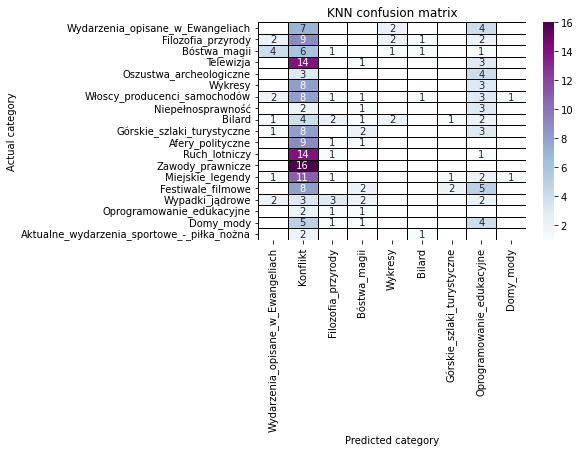

In [5]:
#KNN Euclidean

from sklearn.neighbors import KNeighborsClassifier
m_KNN = KNeighborsClassifier(p=2, metric="euclidean")
scores = cross_val_score(m_KNN, X, y, cv=5, scoring='recall_macro')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
predicted = cross_val_predict(m_KNN, X, y, cv=5)
#fig, ax = plt.subplots()
#ax.scatter(y, predicted, edgecolors=(0, 0, 0))
#ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
#ax.set_xlabel("Measured")
#ax.set_ylabel("Predicted")
#plt.show()

from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import methods as met;
cm = confusion_matrix(y, predicted)
print(cm)
met.draw_confusion_matrix_heatmap(cf_matrix=cm, title="KNN confusion matrix", xlabels=list(categories_dict.values()), ylabels=list(categories_dict.values()))


[0.275  0.15   0.1125 0.175  0.0625]
Accuracy: 0.16 (+/- 0.07)
[[ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 19  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0

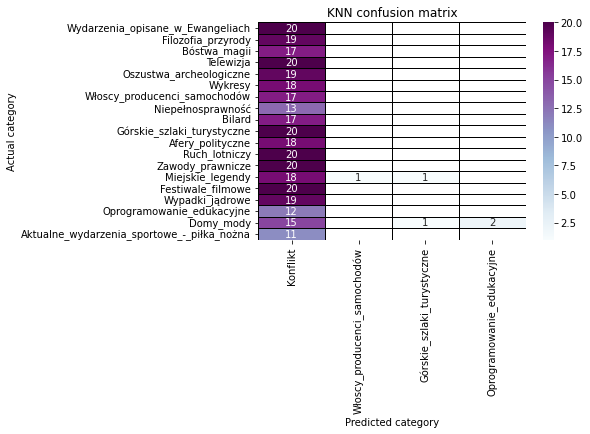

In [6]:
#KNN Manhattan

from sklearn.neighbors import KNeighborsClassifier
m_KNN = KNeighborsClassifier(p=1, metric="manhattan")
scores = cross_val_score(m_KNN, X, y, cv=5, scoring='recall_macro')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
predicted = cross_val_predict(m_KNN, X, y, cv=5)
#fig, ax = plt.subplots()
#ax.scatter(y, predicted, edgecolors=(0, 0, 0))
#ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
#ax.set_xlabel("Measured")
#ax.set_ylabel("Predicted")
#plt.show()
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import methods as met;
cm = confusion_matrix(y, predicted)
print(cm)
met.draw_confusion_matrix_heatmap(cf_matrix=cm, title="KNN confusion matrix", xlabels=list(categories_dict.values()), ylabels=list(categories_dict.values()))

[0.8625 0.8875 0.875  0.925  0.9125]
Accuracy: 0.89 (+/- 0.02)
[[13  0  4  0  0  0  0  1  0  1  0  0  1  0  0  0  0  0  0  0]
 [ 0 19  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 13  1  0  0  0  0  0  0  0  0  0  0  3  0  1  1  1  0]
 [ 0  0  0 18  0  0  0  0  0  0  0  0  1  0  0  0  0  0  1  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  4  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  1 14  0  0  0  1  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0

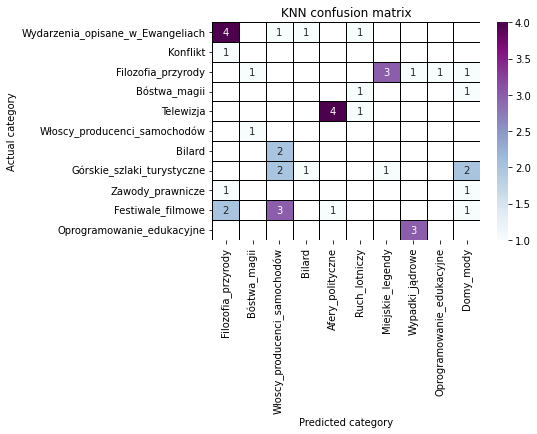

In [7]:
#Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
m_MNB = MultinomialNB()
scores = cross_val_score(m_MNB, X, y, cv=5, scoring='recall_macro')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
predicted = cross_val_predict(m_MNB, X, y, cv=5)
#fig, ax = plt.subplots()
#ax.scatter(y, predicted, edgecolors=(0, 0, 0))
#ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
#ax.set_xlabel("Measured")
#ax.set_ylabel("Predicted")
#plt.show()
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import methods as met;
cm = confusion_matrix(y, predicted)
print(cm)
met.draw_confusion_matrix_heatmap(cf_matrix=cm, title="KNN confusion matrix", xlabels=list(categories_dict.values()), ylabels=list(categories_dict.values()))

In [ ]:
#Multi-layer Perceptron
from sklearn.neural_network import MLPClassifier
m_MLP = MLPClassifier()
scores = cross_val_score(m_MLP, X, y, cv=5, scoring='recall_macro')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
predicted = cross_val_predict(m_MLP, X, y, cv=5)
#fig, ax = plt.subplots()
#ax.scatter(y, predicted, edgecolors=(0, 0, 0))
#ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
#ax.set_xlabel("Measured")
#ax.set_ylabel("Predicted")
#plt.show()
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import methods as met;
cm = confusion_matrix(y, predicted)
print(cm)
met.draw_confusion_matrix_heatmap(cf_matrix=cm, title="KNN confusion matrix", xlabels=list(categories_dict.values()), ylabels=list(categories_dict.values()))

[0.9    0.8375 0.95   0.9    0.975 ]
Accuracy: 0.91 (+/- 0.05)


In [ ]:
# Przygotowanie bag of words
from numpy import genfromtxt, int32
my_data = genfromtxt('../.idea/matrix-pl-20211020', dtype = int32, skip_header = 1, delimiter=' ')
bag_of_words = dict()

for row in my_data:
    row_dict = dict()
    for i, word_count in enumerate(row[1:], start = 1):
        if word_count > 0:
            row_dict[i] = word_count
    bag_of_words[row[0]] = row_dict
